# G2M Case Study
## Data Glacier Online Virtual Internship
### Presented by Giorgos Moysiadis


Importing primary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the datasets

In [2]:
cab_data = pd.read_csv('data/Cab_Data.csv')
customers_data = pd.read_csv('data/Customer_ID.csv')
transactions_data = pd.read_csv('data/Transaction_ID.csv')
cities_data = pd.read_csv('data/City.csv')

### The 4 datasets contain
1. Cab_Data – describes details of transaction for 2 cab companies, like KM travelled, city, etc <br>
2. Customer_ID –  contains a unique identifier which links the customer’s demographic details, like age and income <br>
3. Transaction_ID –  contains transactions of customers mapping their id and their payment method (cash/credit) <br>
4. City –  contains list of US cities, their population and number of cab users <br>

In [3]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
customers_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [5]:
transactions_data.head()

,Transaction ID,Customer ID,Payment Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [6]:
cities_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


As we can see with `.head()` we see that we have columns that are case sensitive and have spaces between each word. <br>
In order to solve this inconvinience we are going to make everything in lower case and replace the spaces with
underscores.

In [7]:
# replace spaces with underscore
for col in cab_data.columns:
    if ' ' in col:
        cab_data = cab_data.rename(columns={col:col.replace(' ', '_')})
for col in customers_data.columns:
    if ' ' in col:
        customers_data = customers_data.rename(columns={col:col.replace(' ', '_')})
for col in transactions_data.columns:
    if ' ' in col:
        transactions_data = transactions_data.rename(columns={col:col.replace(' ', '_')})

# lowercase all columns
cab_data.columns = map(str.lower, cab_data.columns)
customers_data.columns = map(str.lower, customers_data.columns)
transactions_data.columns = map(str.lower, transactions_data.columns)
cities_data.columns = map(str.lower, cities_data.columns)

# renaming income per month
customers_data = customers_data.rename(columns={'income_(usd/month)':'income'})

Column `date_of_travel` is in `str` type so we are going to change it to `datetime` type for ease of use

In [8]:
cab_data['date_of_travel'] = pd.to_datetime(cab_data['date_of_travel'], format='%d-%m-%Y')

We are going to split the dates into months and years in order to be able to provide more insight with monthly data

In [9]:
months=[]
years =[]
for i in range(len(cab_data['date_of_travel'])):
    months.append(cab_data['date_of_travel'][i].month)
    years.append(cab_data['date_of_travel'][i].year)

cab_data['month'] = months
cab_data['year'] = years

cab_data = cab_data.drop(['date_of_travel'], axis=1)
cab_data.head()

,transaction_id,company,city,km_travelled,price_charged,cost_of_trip,month,year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


Monthly transactions

In [10]:
pink_monthly = cab_data[cab_data.company=='Pink Cab'].groupby('month').transaction_id.count()
yellow_monthly = cab_data[cab_data.company=='Yellow Cab'].groupby('month').transaction_id.count()

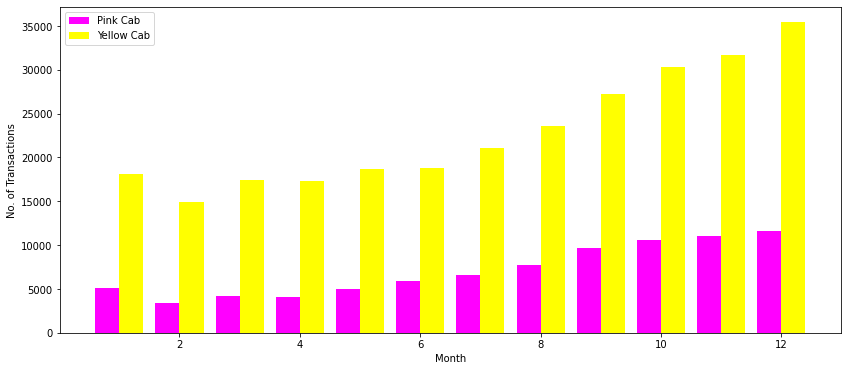

In [11]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(pink_monthly.index-0.2, pink_monthly.values, width=0.4, color='magenta', align='center', label='Pink Cab')
ax.bar(pink_monthly.index+0.2, yellow_monthly.values, width=0.4, color='yellow', align='center', label='Yellow Cab')
plt.ylabel('No. of Transactions')
plt.xlabel('Month')
plt.legend()
plt.show()

Joining all data together

In [12]:
left = cab_data.set_index(['transaction_id'])
right = transactions_data.set_index(['transaction_id'])
data = left.join(right)
left = data.set_index([data.index,'customer_id'])
right = customers_data.set_index(['customer_id'])
data = left.join(right)
data = data.reset_index()
data.head()

,transaction_id,customer_id,company,city,km_travelled,price_charged,cost_of_trip,month,year,payment_mode,gender,age,income
0,10000011,29290,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016,Card,Male,28,10813
1,10000012,27703,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016,Card,Male,27,9237
2,10000013,28712,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016,Cash,Male,53,11242
3,10000014,28020,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016,Cash,Male,23,23327
4,10000015,27182,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016,Card,Male,33,8536


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  359392 non-null  int64  
 1   customer_id     359392 non-null  int64  
 2   company         359392 non-null  object 
 3   city            359392 non-null  object 
 4   km_travelled    359392 non-null  float64
 5   price_charged   359392 non-null  float64
 6   cost_of_trip    359392 non-null  float64
 7   month           359392 non-null  int64  
 8   year            359392 non-null  int64  
 9   payment_mode    359392 non-null  object 
 10  gender          359392 non-null  object 
 11  age             359392 non-null  int64  
 12  income          359392 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 35.6+ MB


* Data has integer and float values and string values where object occurs
* No variable column has null/missing values

In [14]:
data.describe()

,transaction_id,customer_id,km_travelled,price_charged,cost_of_trip,month,year,age,income
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,22.567254,423.443311,286.190113,7.500434,2017.045199,35.336705,15048.822937
std,1.268058e+05,21012.412463,12.233526,274.378911,157.993661,3.445095,0.800239,12.594234,7969.409482
min,1.000001e+07,1.000000,1.900000,15.600000,19.000000,1.000000,2016.000000,18.000000,2000.000000
25%,1.011081e+07,2705.000000,12.000000,206.437500,151.200000,5.000000,2016.000000,25.000000,8424.000000
50%,1.022104e+07,7459.000000,22.440000,386.360000,282.480000,8.000000,2017.000000,33.000000,14685.000000
75%,1.033094e+07,36078.000000,32.960000,583.660000,413.683200,10.000000,2018.000000,42.000000,21035.000000
max,1.044011e+07,60000.000000,48.000000,2048.030000,691.200000,12.000000,2018.000000,65.000000,35000.000000


* Here as we can notice mean value of `cost_of_trip` is sligtly above than its median value which is represented by 50%
(50th percentile) in index column
* Although `price_charged` compensates its driver as we can notice that the mean value is quite larger than the 50%
value

Transactions per city

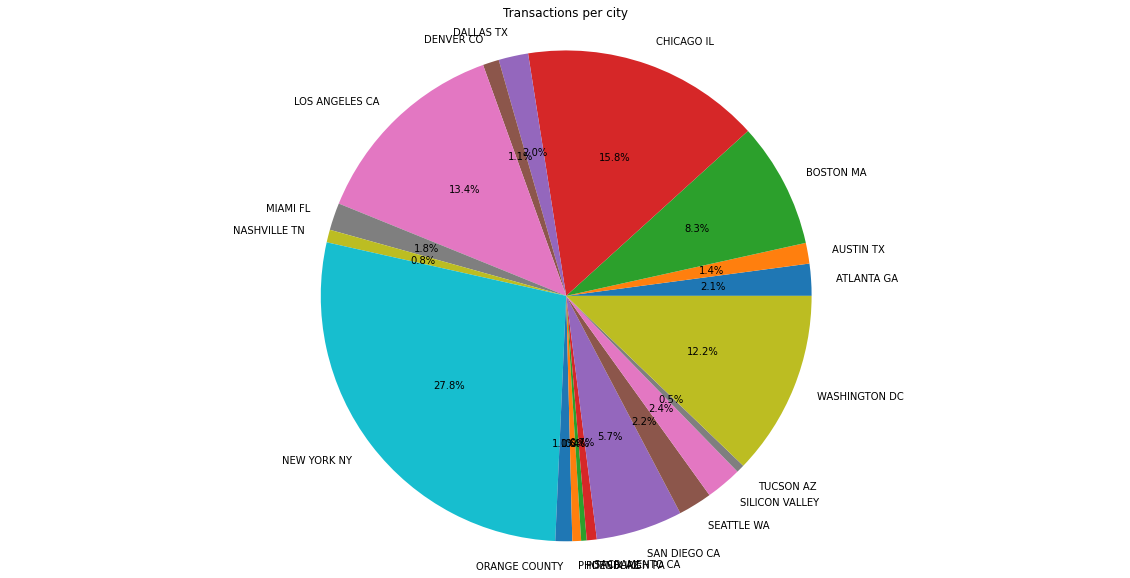

In [15]:
city_count = data.groupby('city').transaction_id.count()
fig, ax = plt.subplots(figsize=(20,10))
ax.pie(city_count.values, labels=city_count.index, autopct='%.1f%%')
ax.axis('equal')
plt.title('Transactions per city')
plt.show()

Payment methods and prices charged

In [16]:
data.groupby(['company', 'payment_mode']).transaction_id.count()

company     payment_mode
Pink Cab    Card             50719
            Cash             33992
Yellow Cab  Card            164785
            Cash            109896
Name: transaction_id, dtype: int64

In [17]:
earnings = data.groupby(['month']).price_charged.sum()

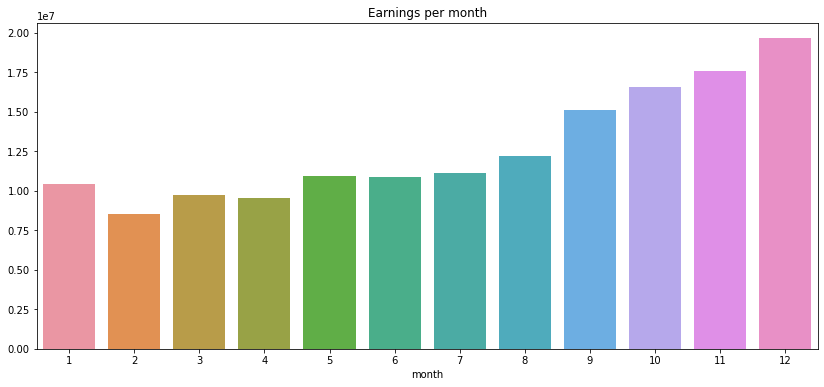

In [18]:
plt.figure(figsize=(14,6))
sns.barplot(x=earnings.index, y=earnings.values)
plt.title('Earnings per month')
plt.show()

In [19]:
data.groupby(['company','gender']).transaction_id.count()

company     gender
Pink Cab    Female     37480
            Male       47231
Yellow Cab  Female    116000
            Male      158681
Name: transaction_id, dtype: int64

Correlation analysis

<AxesSubplot:>

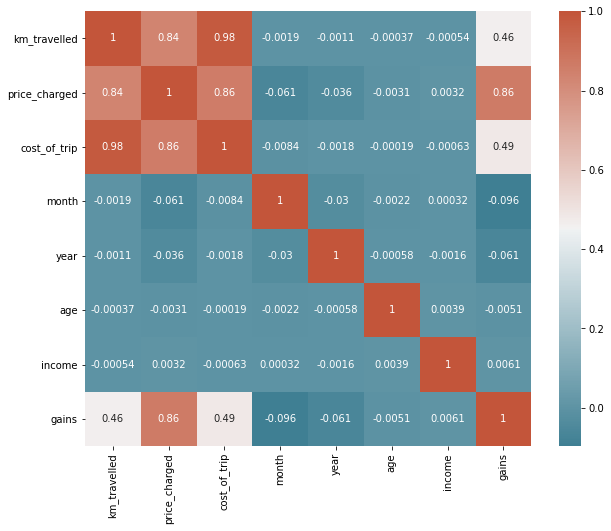

In [20]:
data['gains'] = (data['price_charged']-data['cost_of_trip'])
df = data[['km_travelled','price_charged','cost_of_trip','month','year','age','income','gains']]

corr = df.corr()
_, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True), ax=ax)

<AxesSubplot:xlabel='km_travelled', ylabel='gains'>

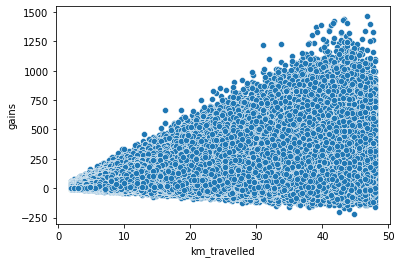

In [28]:
sns.scatterplot(x=df['km_travelled'], y=df['gains'])

As it can be seen from the above scatterplot there are instances where the taxi driver doesn't gain at all from certain
cab trips

In [29]:
negative_gains = data[data['gains'] < 0]
negative_gains.groupby(['company', 'year']).transaction_id.count()



company     year
Pink Cab    2016    3241
            2017    4362
            2018    3526
Yellow Cab  2016    3886
            2017    5095
            2018    4709
Name: transaction_id, dtype: int64

<AxesSubplot:xlabel='km_travelled', ylabel='gains'>

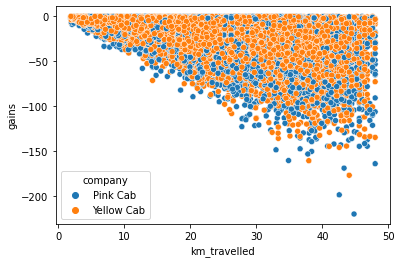

In [32]:
sns.scatterplot(x=negative_gains['km_travelled'], y=negative_gains['gains'], hue=negative_gains['company'])